# Setup

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns


# Read CSV file

In [14]:
df = pd.read_csv('dataset.csv')
print(df.shape)
df.head(df.shape[0])

(450, 3)


,P1,P2,Label
0,-2.320839,-2.895868,0
1,2.264439,-1.701983,1
2,-1.920861,-1.330257,0
3,-2.386946,1.707116,2
4,1.401760,-2.559458,1
...,...,...,...
445,1.199934,-2.736522,1
446,2.860024,-1.320753,1
447,-2.399012,-0.522074,0
448,1.576894,-2.445768,1


In [15]:
# a function for 1-hot encoding the output labels

def normalize(input):
  if input == 0:
    return [1,0,0]
  elif input == 1:
    return [0,1,0]
  elif input == 2:
    return [0,0,1]
  else:
    return [0, 0, 0]

In [16]:
X1 = df["P1"].values.tolist()
X2 = df["P2"].values.tolist()
Y = df["Label"].values.tolist()

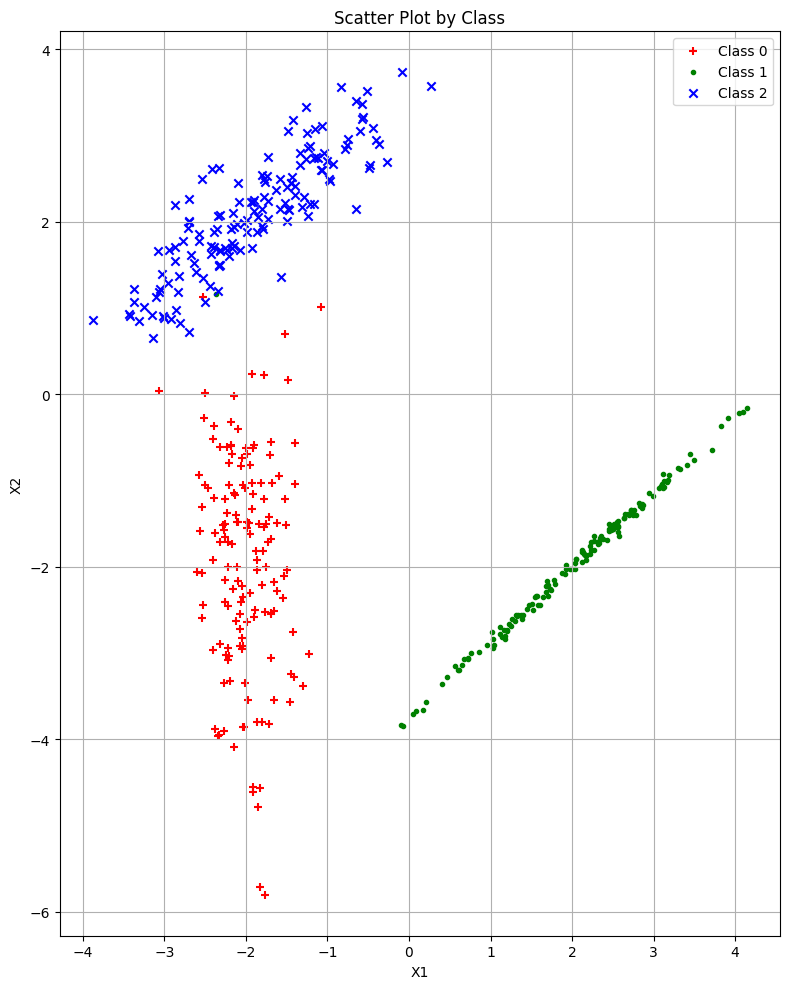

In [17]:
plt.figure(figsize=(8,10))

# Convert X1, X2 to NumPy arrays if they aren't already
X1 = np.array(X1)
X2 = np.array(X2)
Y = np.array(Y)

plt.scatter(X1[Y==0], X2[Y==0], color='red', marker='+', label='Class 0')
plt.scatter(X1[Y==1], X2[Y==1], color='green', marker='.', label='Class 1')
plt.scatter(X1[Y==2], X2[Y==2], color='blue', marker='x', label='Class 2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot by Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
features = list(zip(X1, X2)) #zipping the 2 input features into a list

features_np = np.array(features) #converting the list into a numpy array

 # normalizing the output labels to be one-hot encoded and
 # turning it into a numpy array

Y2 = np.array([normalize(i) for i in Y])

# dividing the total set into training (300) & testing (100) sets

features_train = features_np[:300]
Y2_train = Y2[:300]

features_test = features_np[300:]
Y2_test = Y2[300:]



# Neural Network - Training & testing

In [19]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2, hidden1LayerNeurons = 20, hidden2LayerNeurons = 20, hidden3LayerNeurons = 20, outLayerNeurons = 3, learning_rate = 0.001, activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight initialization
        self.W_H1I = np.random.randn(inputLayerNeurons, hidden1LayerNeurons)
        self.W_H2H1 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons)
        self.W_H3H2 = np.random.randn(hidden2LayerNeurons, hidden3LayerNeurons)
        self.W_OH3 = np.random.randn(hidden3LayerNeurons, outLayerNeurons)

        # random bias initialization
        self.biases = [
            np.random.randn(hidden1LayerNeurons),
            np.random.randn(hidden2LayerNeurons),
            np.random.randn(hidden3LayerNeurons),
            np.random.randn(outLayerNeurons)
        ]

    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return np.exp(-x) / (1 + np.exp(-x))**2 # return x * (1-x)
            else:
                return 1 / (1 + np.exp(-x)) # 1 / (1 + e^-x)

        
    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I) + self.biases[0]
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) + self.biases[1]
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) + self.biases[2]
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_OH3) + self.biases[3]
        pred = self.activation(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH3 += self.hidden3_output.T.dot(output_delta)

        self.biases[0] += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.biases[1] += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.biases[2] += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.biases[3] += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)


Epoch: 0, error: 0.41867439795777917
Epoch: 10000, error: 0.008867155035955417
Epoch: 20000, error: 0.0073861098371384905
Epoch: 30000, error: 0.006794319166115304
Epoch: 40000, error: 0.006431564818541828
Epoch: 50000, error: 0.006166214570515625
Epoch: 60000, error: 0.005954821718562141
Epoch: 70000, error: 0.005778884467046009
Epoch: 80000, error: 0.0056290071671972475
Epoch: 90000, error: 0.005499666447839273


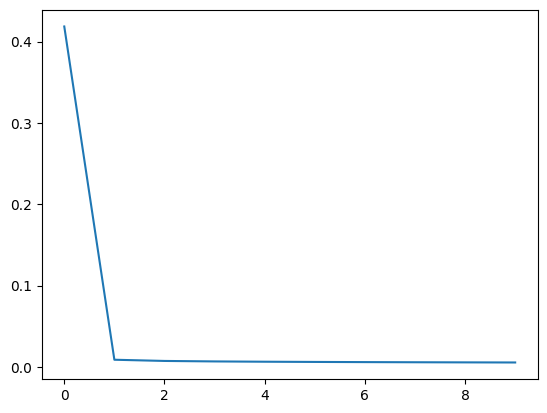

In [20]:
NN = NeuralNetwork(activation_type = 'sigmoid')

err_list = []

for i in range(100000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [21]:
# stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

# returns the dict key with the highest probablity

def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

# testing a random input

pred = NN.feedForward([1,1])
print(getProb(pred))
print(getClass(getProb(pred)))  

{'Class-0': np.float64(1.1689896912989626e-05), 'Class-1': np.float64(99.46247772480956), 'Class-2': np.float64(7.1566715860475805)}
Class-1


#Performance Metrics

In [22]:
predictions = NN.feedForward(features_test)


# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

# f1 score fr each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

Overall Accuracy: 0.9866666666666667
Precision for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 0.9661016949152542
Recall: 0.9848484848484849
F1 Score overall: 0.9865009355787223
F1 Scores for each class:
Class 0: 0.9767441860465116
Class 1: 1.0
Class 2: 0.9827586206896551


#Documentation

**Output Layer Adjustment:**
The number of neurons in the output layer was modified from 1 to 3 to support classification across five distinct classes, utilizing a one-hot encoded output format.
Incorporation of Additional Hidden Layers:
Two new parameters were added to define the architecture of the expanded neural network:

**hidden2LayerNeurons:** Specifies the number of neurons in the second hidden layer (configured to 20).
**hidden3LayerNeurons:** Defines the number of neurons in the third hidden layer (set to 20).

**Expanded Weight Matrices:**
To accommodate the deeper network structure, two additional weight matrices were introduced:

**W_H2H1:** Matrix of weights connecting Hidden Layer 1 to Hidden Layer 2.
**W_H3H2:** Matrix of weights linking Hidden Layer 2 to Hidden Layer 3.

**Bias Management Using a List Structure:**
A biases list was implemented, with each entry containing the bias vector for a specific layer (Hidden1, Hidden2, Hidden3, and Output). This structure ensures proper alignment of biases with the neuron count in each layer